# Fluctuation Analysis
A possible way to validate the presence of weak transient sources is to perform the same sort of fluctuation analysis that is being done to estimate the source population of weak, but persistent sources at high energies.
I'll follow a very useful paper, http://arxiv.org/pdf/1104.0010v3.pdf, by Dmitry Malyshev and David Hogg, which applied that technique to the first 11 months of Fermi data.

First, let's grab a month's FT1 and set up pixels. 

In [44]:
%matplotlib inline
import pyfits
from skymaps import Band, SkyDir
nside=32
band = Band(nside)
def hpindex(ra,dec):
    return band.index(SkyDir(ra,dec))
    
os.chdir(os.path.expandvars('$FERMI/skymodels/'))
class MonthFT1(object):
    def __init__(self, month, 
                 folder='/nfs/farm/g/glast/g/catalog/P8_P301/Source/'):
        self.filename=folder + 'P301_Source_%03d_zmax100.fits'% month 
        self.fits = pyfits.open(self.filename)
        self.events=events=self.fits[1].data
        self.ra = np.array(events.RA,float)
        self.dec= np.array(events.DEC,float)
        self.ct = events.CONVERSION_TYPE
        self.glat = events.B
        self.glon = events.L
        self.energy=events.ENERGY
        self.index = np.array(map(hpindex, self.ra, self.dec))
month = MonthFT1(1)

In [80]:
class Pixels(object):
    def __init__(self, ft1, kmax=1000, emin=1000, front_only=False, bmin=0):
        d = np.zeros(npix, int)
        for i,k in enumerate(ft1.index):
            if ft1.energy[i]>emin and np.abs(ft1.glat[i])>bmin:
                d[k]+=1
        self.np = d
        self.nk = np.zeros(kmax)
        for k in self.np:
            if k<kmax:
                self.nk[k]+=1
%time p = Pixels(month, emin=0)        

CPU times: user 19.9 s, sys: 999 µs, total: 19.9 s
Wall time: 19.9 s


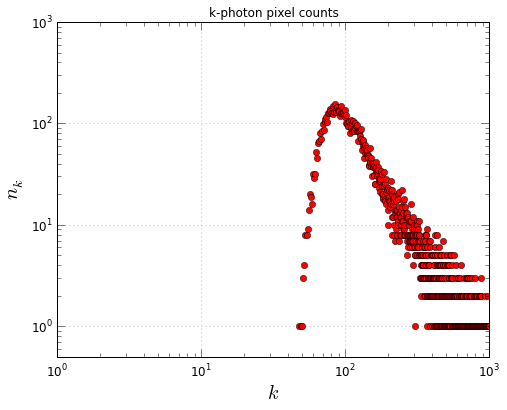

In [102]:
def fig2(pixels):
    fig, ax = plt.subplots(figsize=(8,6))
    histkw = dict(bins=np.logspace(0,3,31), histtype='step', log=True)
    ax.plot(pixels.nk, 'or')
    plt.setp(ax, xscale='log', xlim=(1,1e3),
              ylim=(0.5, None), yscale='log',
            title='k-photon pixel counts')
    plt.xlabel('$k$', fontsize=20)
    plt.ylabel('$n_k$', fontsize=20)
    ax.grid(True, alpha=0.5)
fig2(p)

In [82]:
p2=Pixels(month, emin=1000)

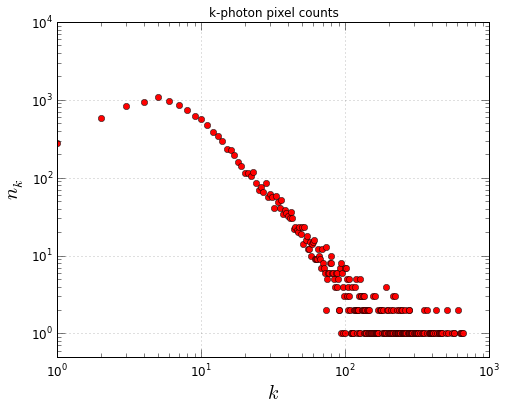

In [103]:
fig2(p2)

In [84]:
p3=Pixels(month, emin=500)

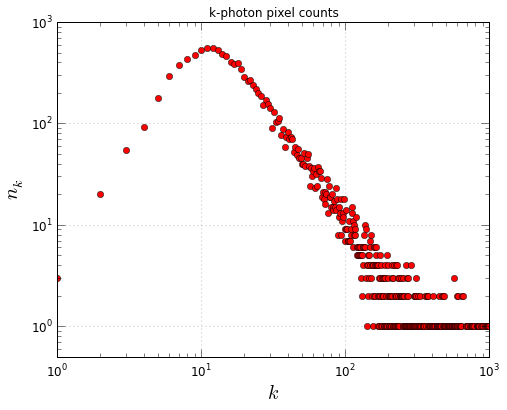

In [104]:
fig2(p3)

In [90]:
p4 = Pixels(month, emin=500, bmin=10)

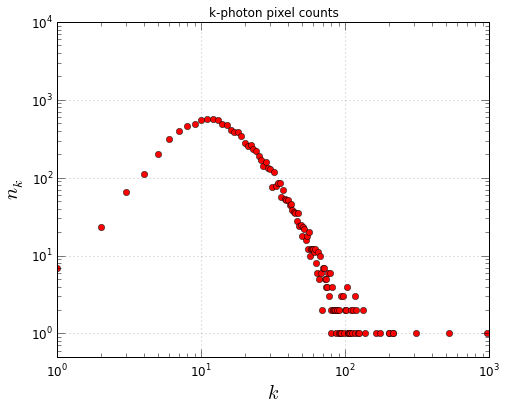

In [105]:
fig2(p4)